In [38]:
import pandas as pd
from datetime import date, timedelta
import sys
sys.path.append('src')

from bond import FixedRateACGB
from discount_curve import fit_discount_curve, DiscountFitOptions, discount_to_yield

In [24]:
gsbu_20 = FixedRateACGB.construct(date(2015, 5, 21), 
    date(2015, 11, 21), date(2020, 11, 21), 0.015, 100)
gsbu_20.market_dirty_price = 101.066

gsbi_21 = FixedRateACGB.construct(date(2007, 5, 15), 
    date(2015, 11, 15), date(2021, 5, 15), 0.0575, 100)
gsbi_21.market_dirty_price = 105.640

gsbm_22 = FixedRateACGB.construct(date(2010, 7, 15), 
    date(2011, 1, 15), date(2022, 7, 15), 0.0575, 100)
gsbm_22.market_dirty_price = 111.177

gsbu_22 = FixedRateACGB.construct(date(2017, 5, 21), 
    date(2017, 11, 21), date(2022, 11, 21), 0.0225, 100)
gsbu_22.market_dirty_price = 105.213

gsbg_23 = FixedRateACGB.construct(date(2011, 10, 21), 
    date(2012, 4, 21), date(2023, 4, 21), 0.055, 100)
gsbg_23.market_dirty_price = 115.900

gsbg_24 = FixedRateACGB.construct(date(2012, 10, 21), 
    date(2013, 4, 21), date(2024, 4, 21), 0.0275, 100)
gsbg_24.market_dirty_price = 109.920

gsbu_24 = FixedRateACGB.construct(date(2020, 5, 21), 
    date(2020, 11, 21), date(2024, 11, 21), 0.0025, 100)
gsbu_24.market_dirty_price = 99.699 

gsbg_25 = FixedRateACGB.construct(date(2013, 10, 21), 
    date(2014, 4, 21), date(2025, 4, 21), 0.0325, 100)
gsbg_25.market_dirty_price = 114.365

gsbg_26 = FixedRateACGB.construct(date(2014, 4, 21), 
    date(2014, 10, 21), date(2026, 4, 21), 0.0425, 100)
gsbg_26.market_dirty_price = 122.362

gsbg_27 = FixedRateACGB.construct(date(2012, 4, 21), 
    date(2012, 10, 21), date(2027, 4, 21), 0.0475, 100)
gsbg_27.market_dirty_price =  128.980

gsbu_27 = FixedRateACGB.construct(date(2016, 5, 21), 
    date(2016, 11, 21), date(2027, 11, 21), 0.0275, 100)
gsbu_27.market_dirty_price =  115.380 

gsbi_28 = FixedRateACGB.construct(date(2016, 5, 21), 
    date(2016, 11, 21), date(2028, 11, 21), 0.0225, 100)
gsbi_28.market_dirty_price =  112.030 

gsbi_28 = FixedRateACGB.construct(date(2017, 5, 21), 
    date(2017, 11, 21), date(2028, 5, 21), 0.0275, 100)
gsbi_28.market_dirty_price =  112.030

bond_universe = [gsbu_20, 
     gsbi_21, 
     gsbm_22, gsbu_22, 
     gsbg_23, 
     gsbg_24, gsbu_24, 
     gsbg_25, 
     gsbg_26, 
     gsbg_27, gsbu_27,
]

# fit with 5 knots
dfo = DiscountFitOptions()
dfo.knot_count = 5
discount_curve = fit_discount_curve(bond_universe, 
    dfo, date(2020, 7, 23))

In [64]:
discount_curve_series = pd.Series(
    {
        date(2020, 7, 23) + timedelta(days=i) : discount_curve(date(2020, 7, 23) + timedelta(days=i))
        for i in range(100, 2000)
    }).astype(float)


yield_curve_series = pd.Series(
    {
        date(2020, 7, 23) + timedelta(days=i) : 10000 * discount_to_yield(
            discount_curve(date(2020, 7, 23) + timedelta(days=i)), 
            date(2020, 7, 23) + timedelta(days=i), 
            date(2020, 7, 23))
        for i in range(100, 2000)
    })

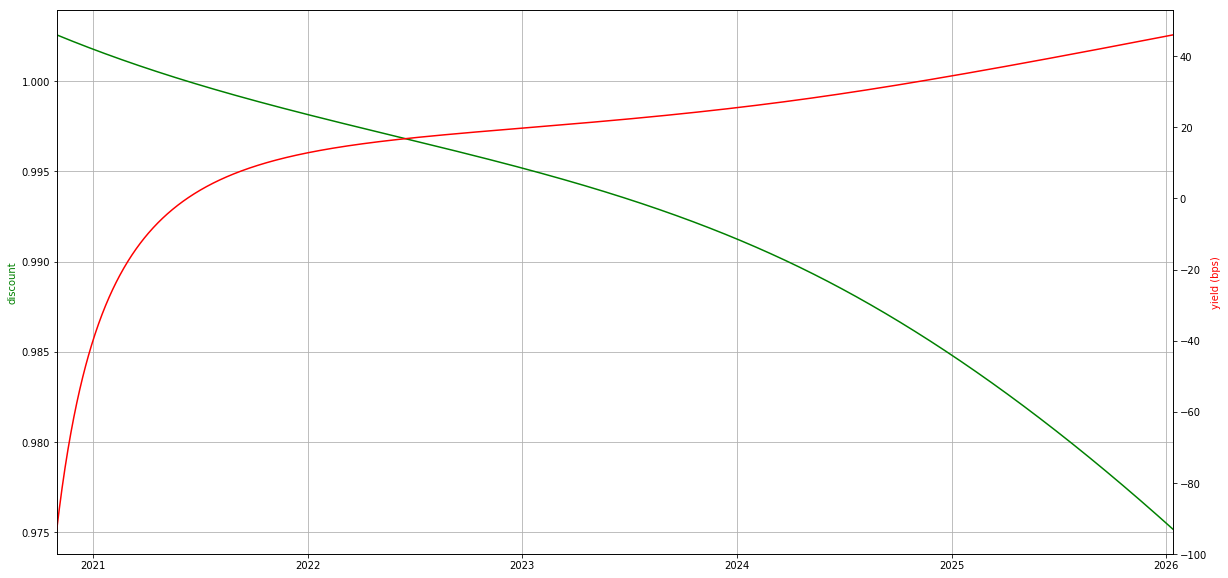

In [70]:
ax = discount_curve_series.plot(figsize=(20, 10), color='g')
ax2 = yield_curve_series.plot(figsize=(20, 10), color='r', ax=ax.twinx())
ax.set_ylabel('discount', color='g')
ax2.set_ylabel('yield (bps)', color='r')
ax.grid()

In [ ]:
# obivously there's a poor fit a the short end -> use other instruments